# COLLABORATIVE FILTERING AS A MODEL OF GROUP DECISION - MAKING

## Data Prepare

In [89]:
import pandas as pd
import math
import numpy as np

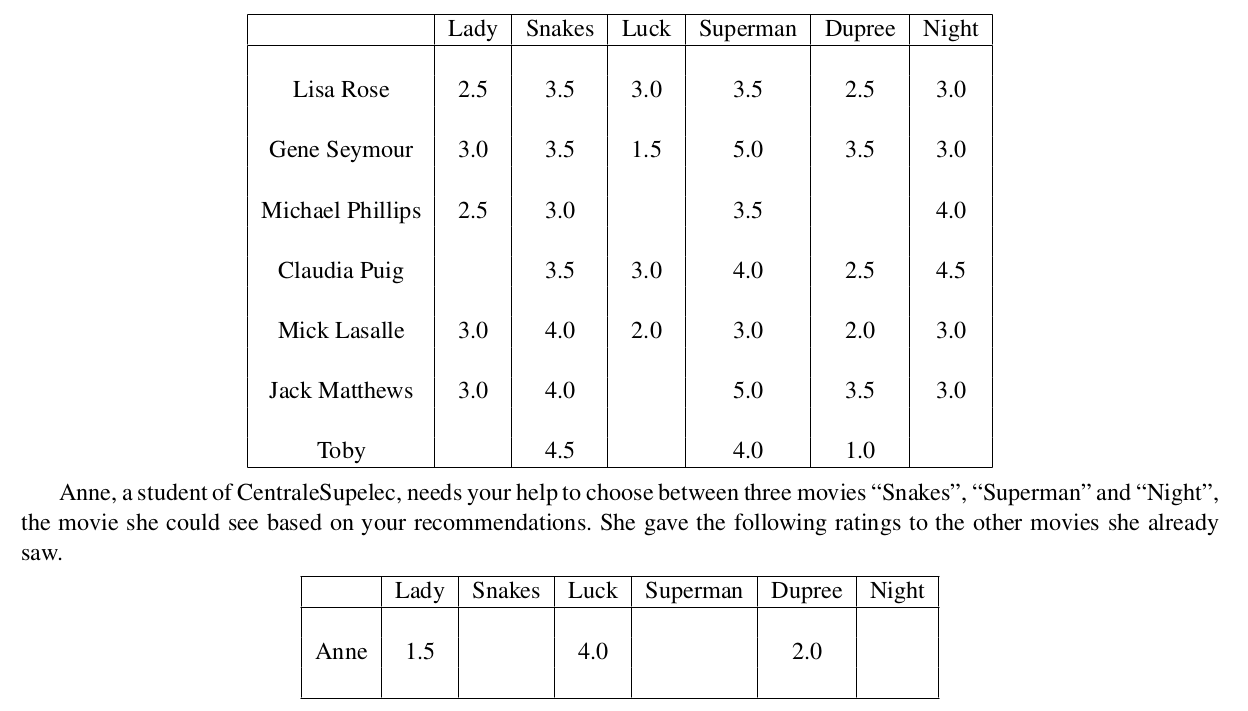

In [90]:
data = {
    "name": ["Lisa Rose", "Gene Seymour", "Michael Phillips", "Claudia Puig", "Mick Lasalle", "Jack Matthews", "Toby", "Anne"],
    "Lady": [2.5, 3.0, 2.5, 0, 3.0, 3.0, 0, 1.5],
    "Snakes": [3.5, 3.5, 3.0, 3.5, 4.0, 4.0, 4.5, 0],
    "Luck": [3.0, 1.5, 0, 3.0, 2.0, 0, 0, 4.0],
    "Superman": [3.5, 5.0, 3.5, 4.0, 3.0, 5.0, 4.0, 0],
    "Dupree": [2.5, 3.5, 0, 2.5, 2.0, 3.5, 1.0, 2.0],
    "Night": [3.0, 3.0, 4.0, 4.5, 3.0, 3.0, 0, 0]
}
df = pd.DataFrame(data)

output_path = "Question_1_2.xlsx"
df.to_excel(output_path, index=False)

## Question 1

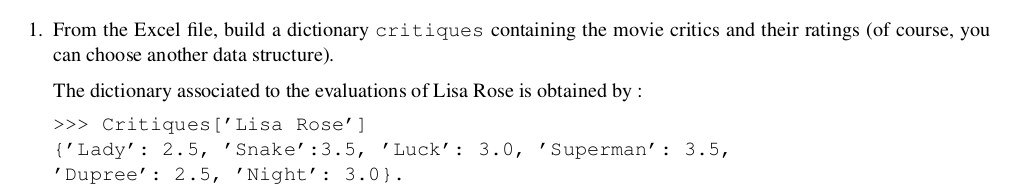

In [91]:
file1 = 'Question_1_2.xlsx'
def get_data(file):
    """
    Obtains a critiques dictionary from the data csv file
    """
    df = pd.read_excel(file)
    critiques = df.set_index('name').transpose().to_dict(orient='dict')
    movie_list = list(df.columns[1:])
    filtered_critiques = {person: {movie: value for movie, value in values.items() if value != 0.0 and not np.isnan(value)} for person, values in critiques.items()}
    return movie_list, filtered_critiques


movie_list1, critiques = get_data(file1)
critiques

{'Lisa Rose': {'Lady': 2.5,
  'Snakes': 3.5,
  'Luck': 3.0,
  'Superman': 3.5,
  'Dupree': 2.5,
  'Night': 3.0},
 'Gene Seymour': {'Lady': 3.0,
  'Snakes': 3.5,
  'Luck': 1.5,
  'Superman': 5.0,
  'Dupree': 3.5,
  'Night': 3.0},
 'Michael Phillips': {'Lady': 2.5,
  'Snakes': 3.0,
  'Superman': 3.5,
  'Night': 4.0},
 'Claudia Puig': {'Snakes': 3.5,
  'Luck': 3.0,
  'Superman': 4.0,
  'Dupree': 2.5,
  'Night': 4.5},
 'Mick Lasalle': {'Lady': 3.0,
  'Snakes': 4.0,
  'Luck': 2.0,
  'Superman': 3.0,
  'Dupree': 2.0,
  'Night': 3.0},
 'Jack Matthews': {'Lady': 3.0,
  'Snakes': 4.0,
  'Superman': 5.0,
  'Dupree': 3.5,
  'Night': 3.0},
 'Toby': {'Snakes': 4.5, 'Superman': 4.0, 'Dupree': 1.0},
 'Anne': {'Lady': 1.5, 'Luck': 4.0, 'Dupree': 2.0}}

## Question 2

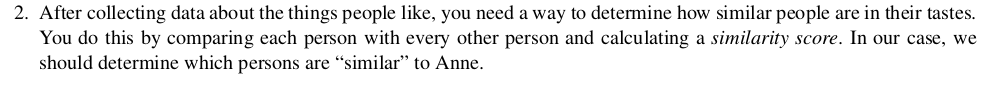

### a

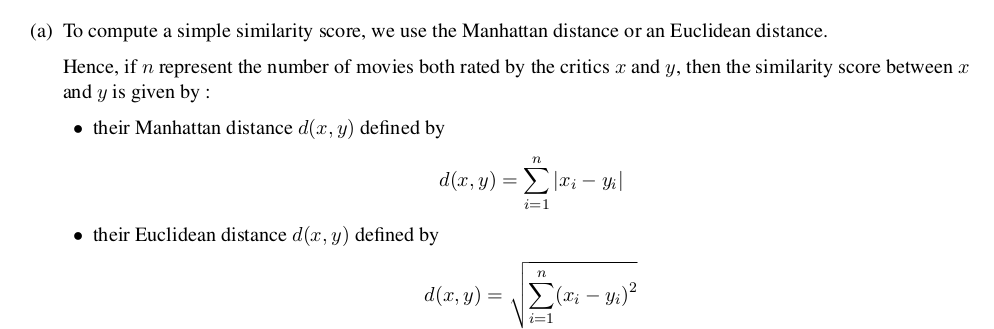

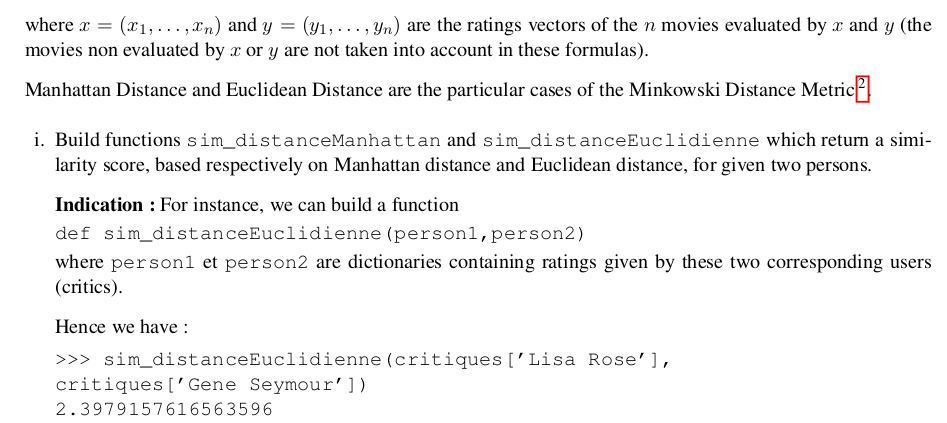

In [92]:
def sim_distanceManhattan(person_a, person_b):
    distance = 0
    for movie, rating_a in person_a.items():
        if movie in person_b and not pd.isna(person_b[movie]):
            distance += abs(rating_a - person_b[movie])
    return distance

def sim_distanceEuclidienne(person1, person2):
    common_movies = {movie for movie in person1 if movie in person2 and not pd.isna(person1[movie]) and not pd.isna(person2[movie])}
    if not common_movies:
        return None
    distance = math.sqrt(sum((person1[movie] - person2[movie]) ** 2 for movie in common_movies))
    return distance

manhattan_result = sim_distanceManhattan(critiques['Lisa Rose'], critiques['Gene Seymour'])
euclidean_result = sim_distanceEuclidienne(critiques['Lisa Rose'], critiques['Gene Seymour'])

manhattan_result, euclidean_result


(4.5, 2.3979157616563596)

### b

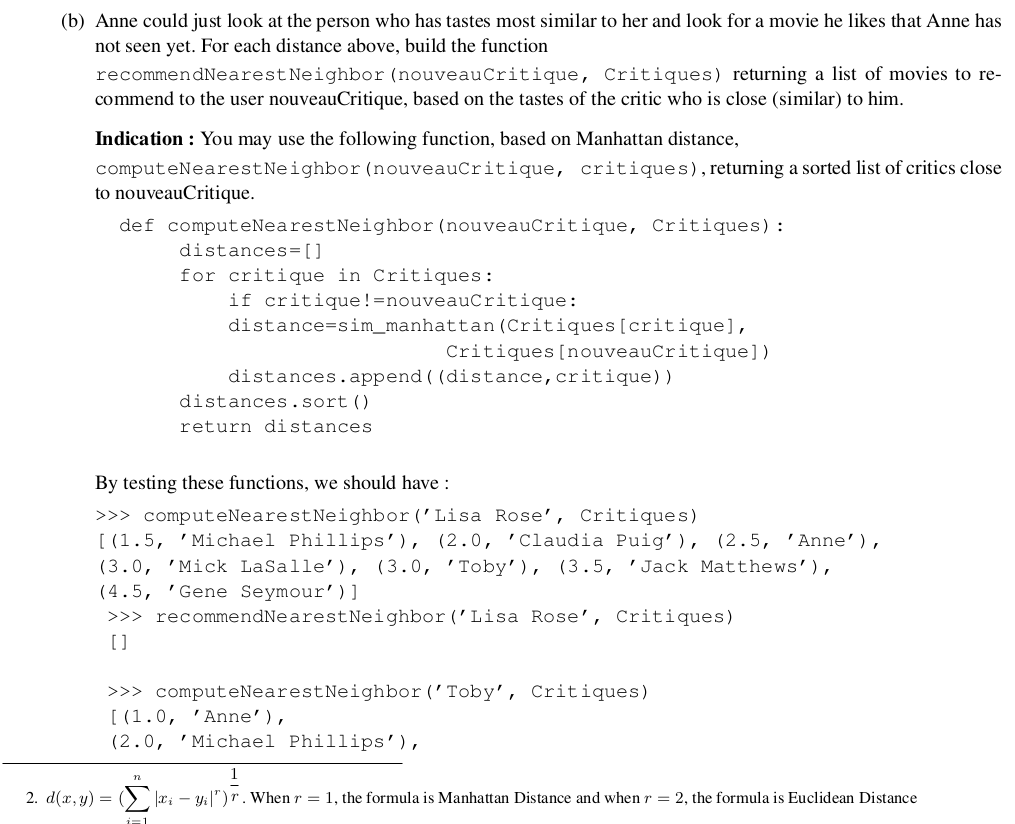

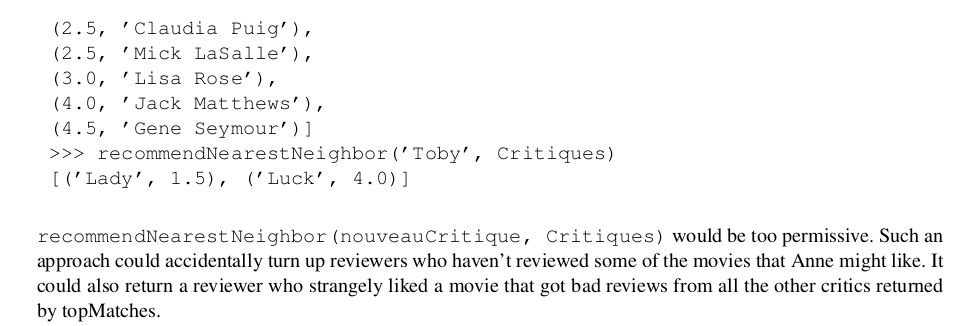

In [ ]:
def compute_nearest_neighbor(nouveauCritique, critiques):
    distances = []
    for critique in critiques:
        if critique != nouveauCritique:
            distance = sim_distanceManhattan(critiques[nouveauCritique], critiques[critique])
            if distance is not None:
                distances.append((distance, critique))
    return sorted(distances, key=lambda x: x[0])

def recommendNearestNeighbor(nouveauCritique, critiques):
    recommended_list = []
    sorted_critique = compute_nearest_neighbor(nouveauCritique, critiques)
    nearestNeighbor = sorted_critique[0][1] if sorted_critique else None
    if nearestNeighbor:
        for movie, rating in critiques[nearestNeighbor].items():
            if movie not in critiques[nouveauCritique] or pd.isna(critiques[nouveauCritique][movie]):
                recommended_list.append((movie, rating))
    return recommended_list

test_neighbors_lisa_rose = compute_nearest_neighbor('Lisa Rose', critiques)
test_recommendations_lisa_rose = recommendNearestNeighbor('Lisa Rose', critiques)
test_neighbors_toby = compute_nearest_neighbor('Toby', critiques)
test_recommendations_toby = recommendNearestNeighbor('Toby', critiques)

test_neighbors_lisa_rose, test_recommendations_lisa_rose, test_neighbors_toby, test_recommendations_toby


([(1.5, 'Michael Phillips'),
  (2.0, 'Claudia Puig'),
  (2.5, 'Anne'),
  (3.0, 'Mick Lasalle'),
  (3.0, 'Toby'),
  (3.5, 'Jack Matthews'),
  (4.5, 'Gene Seymour')],
 [],
 [(1.0, 'Anne'),
  (2.0, 'Michael Phillips'),
  (2.5, 'Claudia Puig'),
  (2.5, 'Mick Lasalle'),
  (3.0, 'Lisa Rose'),
  (4.0, 'Jack Matthews'),
  (4.5, 'Gene Seymour')],
 [('Lady', 1.5), ('Luck', 4.0)])

### c

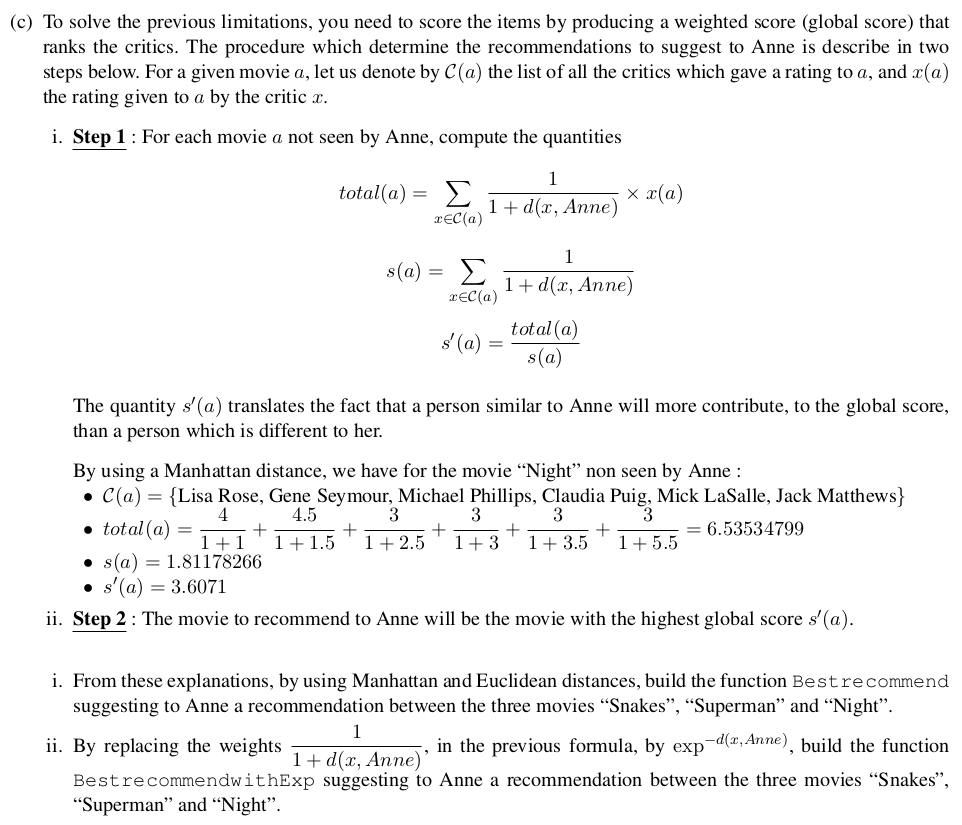

In [ ]:
def BestrecommendwithExp(nouveauCritique, critiques, movie_list):
    max_s_dash = 0
    movieRecommended = ""
    nouveauMovie = [movie for movie in movie_list if movie not in critiques[nouveauCritique]]

    for movie in nouveauMovie:
        total, s = 0, 0
        for critic, ratings in critiques.items():
            if movie in ratings:
                rating = ratings[movie]
                dist = sim_distanceManhattan(critiques[nouveauCritique], ratings)
                weight = math.exp(-dist) if dist is not None else 0
                total += weight * rating
                s += weight
        if s > 0:
            s_dash = total / s
            print(f"{movie}: {s_dash}")
            if s_dash > max_s_dash:
                max_s_dash = s_dash
                movieRecommended = movie
    return movieRecommended

recommended_movie_exp_manhattan = BestrecommendwithExp('Anne', critiques, ["Snakes", "Superman", "Night"])
recommended_movie_exp_manhattan

Snakes: 3.699042610620127
Superman: 3.821068742837592
Night: 3.927900678942954


'Night'

### d

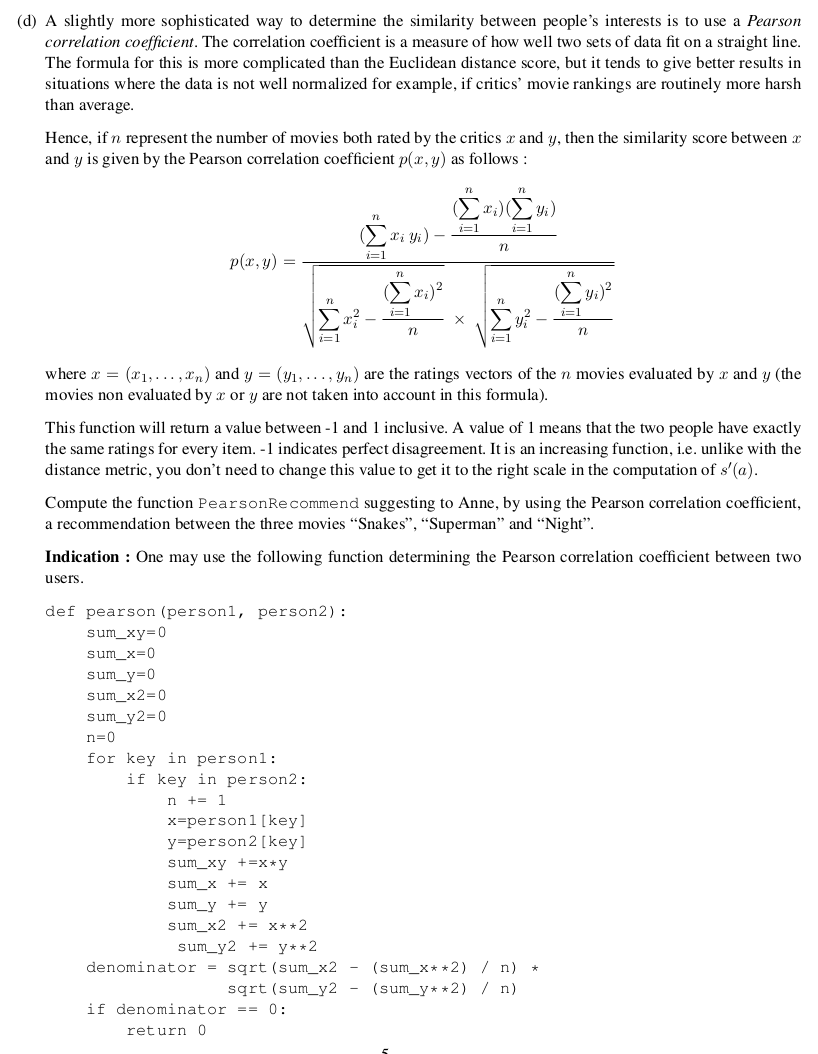

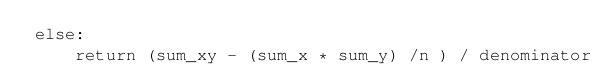

In [95]:
def pearson_similarity(person1, person2):
    sum_xy = sum_x = sum_y = sum_x2 = sum_y2 = 0
    n = 0

    for item in person1:
        if item in person2:
            x = person1[item]
            y = person2[item]
            sum_xy += x * y
            sum_x += x
            sum_y += y
            sum_x2 += x**2
            sum_y2 += y**2
            n += 1

    if n == 0:
        return 0

    denominator = math.sqrt(sum_x2 - (sum_x**2) / n) * math.sqrt(sum_y2 - (sum_y**2) / n)
    if denominator == 0:
        return 0

    return (sum_xy - (sum_x * sum_y) / n) / denominator

def PearsonRecommend(nouveauCritique, critiques, movie_list):
    max_s_dash, movieRecommended = 0, ""
    nouveauMovie = [movie for movie in movie_list if movie not in critiques[nouveauCritique]]

    for movie in nouveauMovie:
        total, s = 0, 0
        for critic, ratings in critiques.items():
            if movie in ratings:
                rating = ratings[movie]
                similarity = pearson_similarity(critiques[nouveauCritique], ratings)
                weight = 2 + similarity
                total += weight * rating
                s += weight

        if s > 0:
            s_dash = total / s
            print(f"{movie}: {s_dash}")
            if s_dash > max_s_dash:
                max_s_dash = s_dash
                movieRecommended = movie

    print(f"Movie recommended for {nouveauCritique} with Pearson similarity: {movieRecommended}")
    return movieRecommended

# Testing the Pearson-based recommendation function
recommended_movie_pearson = PearsonRecommend('Anne', critiques, ["Snakes", "Superman", "Night"])
recommended_movie_pearson

Snakes: 3.7057573942507074
Superman: 4.016590833596276
Night: 3.484370282481602
Movie recommended for Anne with Pearson similarity: Superman


'Superman'

### e

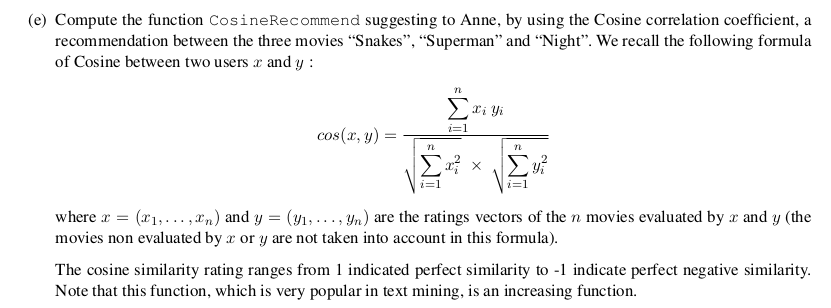

In [96]:
def cosine_similarity(person1, person2):
    sum_xy = sum_x2 = sum_y2 = 0
    for item in person1:
        if item in person2:
            x = person1[item]
            y = person2[item]
            sum_xy += x * y
            sum_x2 += x**2
            sum_y2 += y**2
    denominator = math.sqrt(sum_x2) * math.sqrt(sum_y2)
    if denominator == 0:
        return 0
    return sum_xy / denominator

def CosineRecommend(nouveauCritique, critiques, movie_list):
    max_s_dash, movieRecommended = 0, ""
    nouveauMovie = [movie for movie in movie_list if movie not in critiques[nouveauCritique]]
    for movie in nouveauMovie:
        total, s = 0, 0
        for critic, ratings in critiques.items():
            if movie in ratings:
                rating = ratings[movie]
                similarity = cosine_similarity(critiques[nouveauCritique], ratings)
                weight = 2 + similarity
                total += weight * rating
                s += weight
        if s > 0:
            s_dash = total / s
            print(f"{movie}: {s_dash}")
            if s_dash > max_s_dash:
                max_s_dash = s_dash
                movieRecommended = movie
    print(f"Movie recommended for {nouveauCritique} with Cosine similarity: {movieRecommended}")
    return movieRecommended

recommended_movie_cosine = CosineRecommend('Anne', critiques, ["Snakes", "Superman", "Night"])
recommended_movie_cosine

Snakes: 3.7154084290311378
Superman: 3.9970998809835616
Night: 3.42547333955677
Movie recommended for Anne with Cosine similarity: Superman


'Superman'

## Question 3

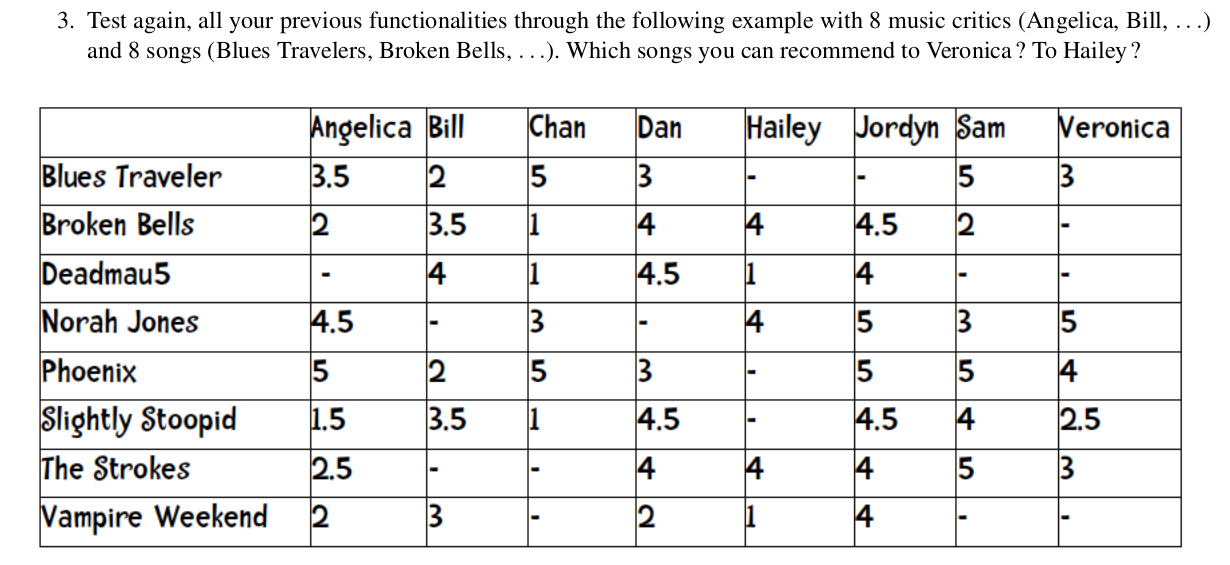

In [97]:
data = {
    "name": ["Angelica", "Bill", "Chan", "Dan", "Hailey", "Jordyn", "Sam", "Veronica"],
    "Blues Traveler": [3.5, 2, 5, 3, None, None, 5, 3],
    "Broken Bells": [2, 3.5, 1, 4, 4, 4.5, 2, None],
    "Deadmau5": [None, 4, 1, 4.5, 1, 4, None, None],
    "Norah Jones": [4.5, None, 3, None, 4, 5, 3, 5],
    "Phoenix": [5, 2, 5, 3, None, 5, 5, 4],
    "Slightly Stoopid": [1.5, 3.5, 1, 4.5, None, 4.5, 4, 2.5],
    "The Strokes": [2.5, None, None, 4, 4, 4, 5, 3],
    "Vampire Weekend": [2, 3, None, 2, 1, 4, None, None]
}

df = pd.DataFrame(data).set_index('name')
df.to_excel("Question_3.xlsx")
df_loaded = pd.read_excel("Question_3.xlsx", index_col="name")
df_loaded

,Blues Traveler,Broken Bells,Deadmau5,Norah Jones,Phoenix,Slightly Stoopid,The Strokes,Vampire Weekend
name,,,,,,,,
Angelica,3.5,2.0,NaN,4.5,5.0,1.5,2.5,2.0
Bill,2.0,3.5,4.0,NaN,2.0,3.5,NaN,3.0
Chan,5.0,1.0,1.0,3.0,5.0,1.0,NaN,NaN
Dan,3.0,4.0,4.5,NaN,3.0,4.5,4.0,2.0
Hailey,NaN,4.0,1.0,4.0,NaN,NaN,4.0,1.0
Jordyn,NaN,4.5,4.0,5.0,5.0,4.5,4.0,4.0
Sam,5.0,2.0,NaN,3.0,5.0,4.0,5.0,NaN
Veronica,3.0,NaN,NaN,5.0,4.0,2.5,3.0,NaN


In [98]:
file2 = 'Question_3.xlsx'
movie_list2, critiques2 = get_data(file2)

In [99]:
critiques2

{'Angelica': {'Blues Traveler': 3.5,
  'Broken Bells': 2.0,
  'Norah Jones': 4.5,
  'Phoenix': 5.0,
  'Slightly Stoopid': 1.5,
  'The Strokes': 2.5,
  'Vampire Weekend': 2.0},
 'Bill': {'Blues Traveler': 2.0,
  'Broken Bells': 3.5,
  'Deadmau5': 4.0,
  'Phoenix': 2.0,
  'Slightly Stoopid': 3.5,
  'Vampire Weekend': 3.0},
 'Chan': {'Blues Traveler': 5.0,
  'Broken Bells': 1.0,
  'Deadmau5': 1.0,
  'Norah Jones': 3.0,
  'Phoenix': 5.0,
  'Slightly Stoopid': 1.0},
 'Dan': {'Blues Traveler': 3.0,
  'Broken Bells': 4.0,
  'Deadmau5': 4.5,
  'Phoenix': 3.0,
  'Slightly Stoopid': 4.5,
  'The Strokes': 4.0,
  'Vampire Weekend': 2.0},
 'Hailey': {'Broken Bells': 4.0,
  'Deadmau5': 1.0,
  'Norah Jones': 4.0,
  'The Strokes': 4.0,
  'Vampire Weekend': 1.0},
 'Jordyn': {'Broken Bells': 4.5,
  'Deadmau5': 4.0,
  'Norah Jones': 5.0,
  'Phoenix': 5.0,
  'Slightly Stoopid': 4.5,
  'The Strokes': 4.0,
  'Vampire Weekend': 4.0},
 'Sam': {'Blues Traveler': 5.0,
  'Broken Bells': 2.0,
  'Norah Jones': 3.0

### Recomend to Veronica

In [100]:
manhattan_result = sim_distanceManhattan(critiques2['Veronica'], critiques2['Bill'])
euclidean_result = sim_distanceEuclidienne(critiques2['Veronica'], critiques2['Bill'])

manhattan_result, euclidean_result

(4.0, 2.449489742783178)

In [101]:
# Testing to ensure it matches the output format
test_neighbors_lisa_rose = compute_nearest_neighbor('Veronica', critiques2)
test_recommendations_lisa_rose = recommendNearestNeighbor('Veronica', critiques2)

test_neighbors_lisa_rose, test_recommendations_lisa_rose

([(2.0, 'Hailey'),
  (3.5, 'Angelica'),
  (4.0, 'Bill'),
  (4.0, 'Dan'),
  (4.0, 'Jordyn'),
  (6.5, 'Chan'),
  (8.5, 'Sam')],
 [('Broken Bells', 4.0), ('Deadmau5', 1.0), ('Vampire Weekend', 1.0)])

In [102]:
# Testing the function to verify if it outputs a single recommended movie with intermediate scores
recommended_movie_exp_manhattan = BestrecommendwithExp('Veronica', critiques2, ["Broken Bells", "Deadmau5", "Vampire Weekend"])

recommended_movie_exp_manhattan

Broken Bells: 3.7060486400373835
Deadmau5: 1.907255466380703
Vampire Weekend: 1.6353931490705687


'Broken Bells'

In [103]:
recommended_movie_pearson = PearsonRecommend('Veronica', critiques2, ["Broken Bells", "Deadmau5", "Vampire Weekend"])

recommended_movie_pearson

Broken Bells: 2.939807076611329
Deadmau5: 2.7177329918798407
Vampire Weekend: 2.4703387409435025
Movie recommended for Veronica with Pearson similarity: Broken Bells


'Broken Bells'

In [104]:
recommended_movie_cosine = CosineRecommend('Veronica', critiques2, ["Broken Bells", "Deadmau5", "Vampire Weekend"])
recommended_movie_cosine

Broken Bells: 3.006022185847446
Deadmau5: 2.9018688116475766
Vampire Weekend: 2.3987672405975244
Movie recommended for Veronica with Cosine similarity: Broken Bells


'Broken Bells'

### Recomend to Hailey

In [105]:
manhattan_result = sim_distanceManhattan(critiques2['Hailey'], critiques2['Bill'])
euclidean_result = sim_distanceEuclidienne(critiques2['Hailey'], critiques2['Bill'])

manhattan_result, euclidean_result

(5.5, 3.640054944640259)

In [106]:
# Testing to ensure it matches the output format
test_neighbors_lisa_rose = compute_nearest_neighbor('Hailey', critiques2)
test_recommendations_lisa_rose = recommendNearestNeighbor('Hailey', critiques2)

test_neighbors_lisa_rose, test_recommendations_lisa_rose

([(2.0, 'Veronica'),
  (4.0, 'Chan'),
  (4.0, 'Sam'),
  (4.5, 'Dan'),
  (5.0, 'Angelica'),
  (5.5, 'Bill'),
  (7.5, 'Jordyn')],
 [('Blues Traveler', 3.0), ('Phoenix', 4.0), ('Slightly Stoopid', 2.5)])

In [107]:
# Testing the function to verify if it outputs a single recommended movie with intermediate scores
recommended_movie_exp_manhattan = BestrecommendwithExp('Hailey', critiques2, ["Blues Traveler", "Phoenix", "Slightly Stoopic"])

recommended_movie_exp_manhattan

Blues Traveler: 3.374134370081063
Phoenix: 4.1267130055552235


'Phoenix'

In [108]:
recommended_movie_pearson = PearsonRecommend('Hailey', critiques2, ["Blues Traveler", "Phoenix", "Slightly Stoopic"])

recommended_movie_pearson

Blues Traveler: 3.616802451042953
Phoenix: 4.197317412008537
Movie recommended for Hailey with Pearson similarity: Phoenix


'Phoenix'

In [109]:
recommended_movie_cosine = CosineRecommend('Hailey', critiques2, ["Blues Traveler", "Phoenix", "Slightly Stoopic"])
recommended_movie_cosine

Blues Traveler: 3.591965106281967
Phoenix: 4.155428801024423
Movie recommended for Hailey with Cosine similarity: Phoenix


'Phoenix'

## Question 4

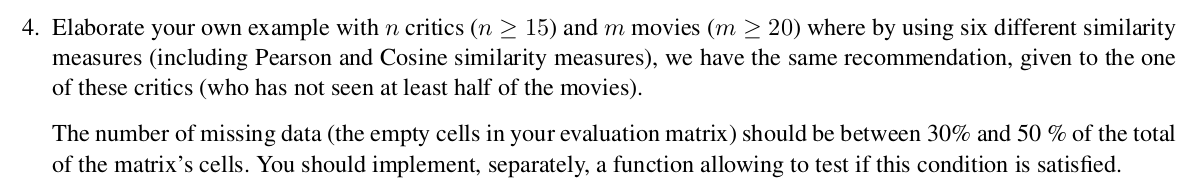

In [110]:
import math
import pandas as pd
import random
import numpy as np

def generate_random_ratings(n_critics=15, n_movies=20, perc_missing=0.4):
    ratings = {}
    movies = [f"Movie_{i}" for i in range(n_movies)]
    for critic in range(n_critics):
        critic_ratings = {movie: random.randint(1, 5) for movie in movies}
        ratings[f"Critic_{critic}"] = critic_ratings
    
    for critic in ratings:
        for movie in list(ratings[critic].keys()):
            if random.random() < perc_missing:
                ratings[critic][movie] = None
    return movies, ratings

def check_missing_data(movies, ratings, lower_bound=30, upper_bound=50):
    total_cells = len(movies) * len(ratings)
    missing_cells = sum(1 for critic in ratings for movie in movies if ratings[critic].get(movie) is None)
    missing_percentage = (missing_cells / total_cells) * 100
    return lower_bound <= missing_percentage <= upper_bound

def check_target_critic(target_critic, movies, ratings):
    rated_movies = sum(1 for movie in movies if ratings[target_critic].get(movie) is not None)
    return rated_movies < len(movies) / 2

def manhattan(person1, person2):
    return sum(abs(person1[movie] - person2[movie])
               for movie in person1 if movie in person2 and person1[movie] is not None and person2[movie] is not None)

def exponential_manhattan(person1, person2):
    distance = manhattan(person1, person2)
    return math.exp(-distance)

def euclidean(person1, person2):
    distance = sum((person1[movie] - person2[movie]) ** 2
                   for movie in person1 if movie in person2 and person1[movie] is not None and person2[movie] is not None)
    return math.sqrt(distance)

def minkowski(person1, person2, p=3):
    distance = sum(abs(person1[movie] - person2[movie]) ** p
                   for movie in person1 if movie in person2 and person1[movie] is not None and person2[movie] is not None)
    return math.pow(distance, 1/p)

def pearson(person1, person2):
    common_movies = [movie for movie in person1 if movie in person2 and person1[movie] is not None and person2[movie] is not None]
    n = len(common_movies)
    if n == 0:
        return 0
    sum_x = sum(person1[movie] for movie in common_movies)
    sum_y = sum(person2[movie] for movie in common_movies)
    sum_x2 = sum(person1[movie] ** 2 for movie in common_movies)
    sum_y2 = sum(person2[movie] ** 2 for movie in common_movies)
    sum_xy = sum(person1[movie] * person2[movie] for movie in common_movies)
    numerator = sum_xy - (sum_x * sum_y / n)
    denominator = math.sqrt((sum_x2 - sum_x ** 2 / n) * (sum_y2 - sum_y ** 2 / n))
    return numerator / denominator if denominator != 0 else 0

def cosine(person1, person2):
    sum_xy = sum_x2 = sum_y2 = 0
    for movie in person1:
        if movie in person2 and person1[movie] is not None and person2[movie] is not None:
            sum_xy += person1[movie] * person2[movie]
            sum_x2 += person1[movie] ** 2
            sum_y2 += person2[movie] ** 2
    denominator = math.sqrt(sum_x2) * math.sqrt(sum_y2)
    return sum_xy / denominator if denominator != 0 else 0

# Recommend movies for the target critic using each similarity measure
def recommend(target_critic, movies, ratings, similarity_measure):
    best_score = float('-inf')
    best_movie = None
    unseen_movies = [movie for movie in movies if ratings[target_critic].get(movie) is None]

    for movie in unseen_movies:
        total_score = 0
        similarity_sum = 0
        
        for critic in ratings:
            if critic != target_critic and movie in ratings[critic] and ratings[critic][movie] is not None:
                similarity = similarity_measure(ratings[target_critic], ratings[critic])

                if similarity > 0:
                    total_score += similarity * ratings[critic][movie]
                    similarity_sum += similarity
        
        if similarity_sum > 0:
            weighted_score = total_score / similarity_sum
            if weighted_score > best_score:
                best_score = weighted_score
                best_movie = movie
    
    return best_movie or "No recommendation found"

def solve_question_4():
    while True:
        movies, ratings = generate_random_ratings(n_critics=15, n_movies=20, perc_missing=0.4)
        
        if not (check_missing_data(movies, ratings) and check_target_critic("Critic_0", movies, ratings)):
            continue
        
        recommendations = {
            "Manhattan": recommend("Critic_0", movies, ratings, manhattan),
            "Exponential Manhattan": recommend("Critic_0", movies, ratings, exponential_manhattan),
            "Euclidean": recommend("Critic_0", movies, ratings, euclidean),
            "Minkowski": recommend("Critic_0", movies, ratings, lambda x, y: minkowski(x, y, p=3)),
            "Pearson": recommend("Critic_0", movies, ratings, pearson),
            "Cosine": recommend("Critic_0", movies, ratings, cosine)
        }
        
        if len(set(recommendations.values())) == 1:
            break

    for method, movie in recommendations.items():
        print(f"{method} Recommendation: {movie}")
    
    df = pd.DataFrame(ratings).T  
    df.to_excel("Question_4.xlsx", index=True)

solve_question_4()

Manhattan Recommendation: Movie_8
Exponential Manhattan Recommendation: Movie_8
Euclidean Recommendation: Movie_8
Minkowski Recommendation: Movie_8
Pearson Recommendation: Movie_8
Cosine Recommendation: Movie_8


## Question 5

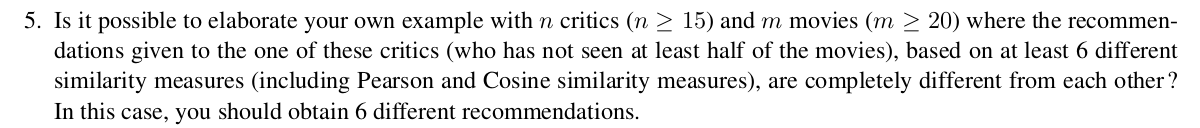

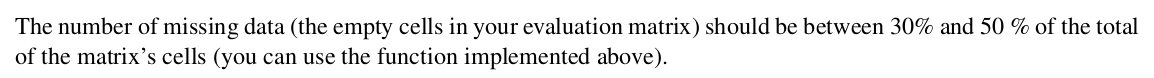

In [111]:
import math
import pandas as pd
import random
import numpy as np

def generate_random_ratings(n_critics=15, n_movies=20, perc_missing=0.4):
    ratings = {}
    movies = [f"Movie_{i}" for i in range(n_movies)]
    for critic in range(n_critics):
        critic_ratings = {movie: random.randint(1, 5) for movie in movies}
        ratings[f"Critic_{critic}"] = critic_ratings
    
    # Randomly remove some ratings to create missing values
    for critic in ratings:
        for movie in list(ratings[critic].keys()):
            if random.random() < perc_missing:
                ratings[critic][movie] = None
    return movies, ratings

def check_missing_data(movies, ratings, lower_bound=30, upper_bound=50):
    total_cells = len(movies) * len(ratings)
    missing_cells = sum(1 for critic in ratings for movie in movies if ratings[critic].get(movie) is None)
    missing_percentage = (missing_cells / total_cells) * 100
    return lower_bound <= missing_percentage <= upper_bound

def check_target_critic(target_critic, movies, ratings):
    rated_movies = sum(1 for movie in movies if ratings[target_critic].get(movie) is not None)
    return rated_movies < len(movies) / 2

# Define similarity measures
def manhattan(person1, person2):
    return sum(abs(person1[movie] - person2[movie])
               for movie in person1 if movie in person2 and person1[movie] is not None and person2[movie] is not None)

def exponential_manhattan(person1, person2):
    distance = manhattan(person1, person2)
    return math.exp(-distance)

def euclidean(person1, person2):
    distance = sum((person1[movie] - person2[movie]) ** 2
                   for movie in person1 if movie in person2 and person1[movie] is not None and person2[movie] is not None)
    return math.sqrt(distance)

def minkowski(person1, person2, p=3):
    distance = sum(abs(person1[movie] - person2[movie]) ** p
                   for movie in person1 if movie in person2 and person1[movie] is not None and person2[movie] is not None)
    return math.pow(distance, 1/p)

def pearson(person1, person2):
    common_movies = [movie for movie in person1 if movie in person2 and person1[movie] is not None and person2[movie] is not None]
    n = len(common_movies)
    if n == 0:
        return 0
    sum_x = sum(person1[movie] for movie in common_movies)
    sum_y = sum(person2[movie] for movie in common_movies)
    sum_x2 = sum(person1[movie] ** 2 for movie in common_movies)
    sum_y2 = sum(person2[movie] ** 2 for movie in common_movies)
    sum_xy = sum(person1[movie] * person2[movie] for movie in common_movies)
    numerator = sum_xy - (sum_x * sum_y / n)
    denominator = math.sqrt((sum_x2 - sum_x ** 2 / n) * (sum_y2 - sum_y ** 2 / n))
    return numerator / denominator if denominator != 0 else 0

def cosine(person1, person2):
    sum_xy = sum_x2 = sum_y2 = 0
    for movie in person1:
        if movie in person2 and person1[movie] is not None and person2[movie] is not None:
            sum_xy += person1[movie] * person2[movie]
            sum_x2 += person1[movie] ** 2
            sum_y2 += person2[movie] ** 2
    denominator = math.sqrt(sum_x2) * math.sqrt(sum_y2)
    return sum_xy / denominator if denominator != 0 else 0

def recommend(target_critic, movies, ratings, similarity_measure):
    best_score = float('-inf')
    best_movie = None
    unseen_movies = [movie for movie in movies if ratings[target_critic].get(movie) is None]

    for movie in unseen_movies:
        total_score = 0
        similarity_sum = 0
        
        for critic in ratings:
            if critic != target_critic and movie in ratings[critic] and ratings[critic][movie] is not None:
                similarity = similarity_measure(ratings[target_critic], ratings[critic])

                if similarity > 0:
                    total_score += similarity * ratings[critic][movie]
                    similarity_sum += similarity
        
        if similarity_sum > 0:
            weighted_score = total_score / similarity_sum
            if weighted_score > best_score:
                best_score = weighted_score
                best_movie = movie
    
    return best_movie or "No recommendation found"

def solve_question_5():
    while True:
        movies, ratings = generate_random_ratings(n_critics=15, n_movies=20, perc_missing=0.4)
        
        if not (check_missing_data(movies, ratings) and check_target_critic("Critic_0", movies, ratings)):
            continue
        
        recommendations = {
            "Manhattan": recommend("Critic_0", movies, ratings, manhattan),
            "Exponential Manhattan": recommend("Critic_0", movies, ratings, exponential_manhattan),
            "Euclidean": recommend("Critic_0", movies, ratings, euclidean),
            "Minkowski": recommend("Critic_0", movies, ratings, lambda x, y: minkowski(x, y, p=3)),
            "Pearson": recommend("Critic_0", movies, ratings, pearson),
            "Cosine": recommend("Critic_0", movies, ratings, cosine)
        }
        
        if len(set(recommendations.values())) == 6:
            break

    for method, movie in recommendations.items():
        print(f"{method} Recommendation: {movie}")
    
    df = pd.DataFrame(ratings).T 
    df.to_excel("Question_5.xlsx", index=True)

solve_question_5()

Manhattan Recommendation: Movie_13
Exponential Manhattan Recommendation: Movie_10
Euclidean Recommendation: Movie_9
Minkowski Recommendation: Movie_4
Pearson Recommendation: Movie_16
Cosine Recommendation: Movie_17
